In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob

../calibrated_files/omegaCen_1_3p6um_rrl_matched_to_kaluzny.cal
../calibrated_files/omegaCen_1_4p5um_rrl_matched_to_kaluzny.cal
../calibrated_files/omegaCen_2_4p5um_rrl_matched_to_kaluzny.cal
../calibrated_files/omegaCen_3_3p6um_rrl_matched_to_kaluzny.cal
../calibrated_files/omegaCen_3_4p5um_rrl_matched_to_kaluzny.cal


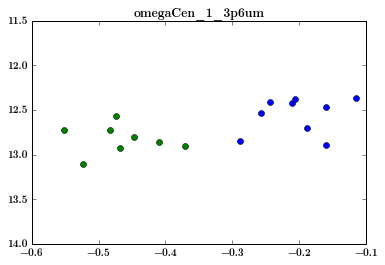

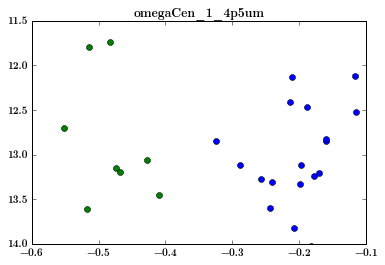

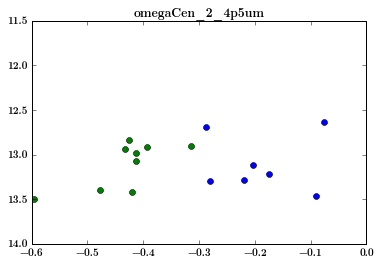

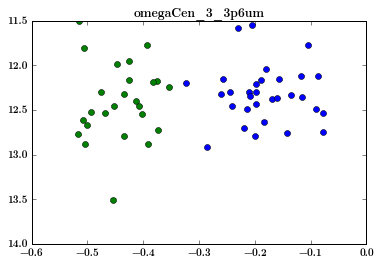

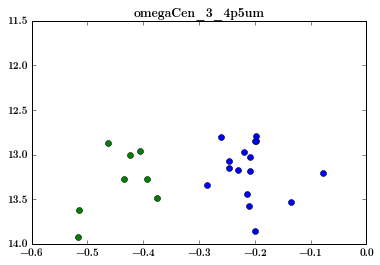

In [51]:
field, filt = 1, '3p6'
cal_dir = '../calibrated_files/'

colnames = [['als_id'],['x'],['y']]
colnames += [['mag_{}'.format(i), 'merr_{}'.format(i)] for i in range(1,15)]
colnames = sum(colnames, [])

cal_files = glob.glob(cal_dir + '*_rrl_matched_to_kaluzny.cal')
for f in cal_files:
    print f
    df = pd.read_csv(f,delim_whitespace=True)
    df.Type = df.Type.str.split('RR').str.get(-1).astype(int)
    df.ID = df.ID.str.split('V').str.get(-1).astype(int)
    df_p = pd.read_csv(f.replace('_matched_to_kaluzny.cal','.raw'),delim_whitespace=True,
                       names=colnames)
    df_p.drop('mag_13',axis=1,inplace=True)
    df_p.drop('merr_13',axis=1,inplace=True)
    df_p.drop('mag_14',axis=1,inplace=True)
    df_p.drop('merr_14',axis=1,inplace=True)
    df_p['mag_avg'] = np.log10(np.mean(10**(df_p.filter(regex='mag')),axis=1))
    df_p['merr_avg'] = np.mean(df_p.filter(regex='merr'),axis=1)/12
    df_comb = df.merge(df_p,on='als_id')
    fig,ax=plt.subplots(1,1)
    df_ab = df_comb[df_comb.Type==0]
    df_c = df_comb[df_comb.Type==1]
    ax.errorbar(np.log10(df_ab['Period']),df_ab['mag_avg'],df_ab['merr_avg'].values,fmt='o')
    ax.errorbar(np.log10(df_c['Period']),df_c['mag_avg'],df_c['merr_avg'].values,fmt='o')
    ax.set_ylim(14,11.5)
    ax.set_title(f.split('/')[-1].split('_rrl')[0])

#df_kaluz = pd.read_csv(cal_dir + 'omegaCen_{}_{}um_rrl_matched_to_kaluzny.cal')